In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plot the results
import seaborn as sns

In [2]:
# load the final enrichment df
final_enrichment_df_path = pathlib.Path(
    "../../data/6.analysis_results/sum_aggregated_feature_group_enrichment.csv"
).resolve(strict=True)
final_enrichment_df = pd.read_csv(final_enrichment_df_path)
final_enrichment_df.head()

,feature_group,hypothesis_test_bool,counts,permutation
0,AreaShape,False,98,non_permuted
1,Granularity,False,6,non_permuted
2,Intensity,False,15,non_permuted
3,Neighbors,False,3,non_permuted
4,RadialDistribution,False,70,non_permuted


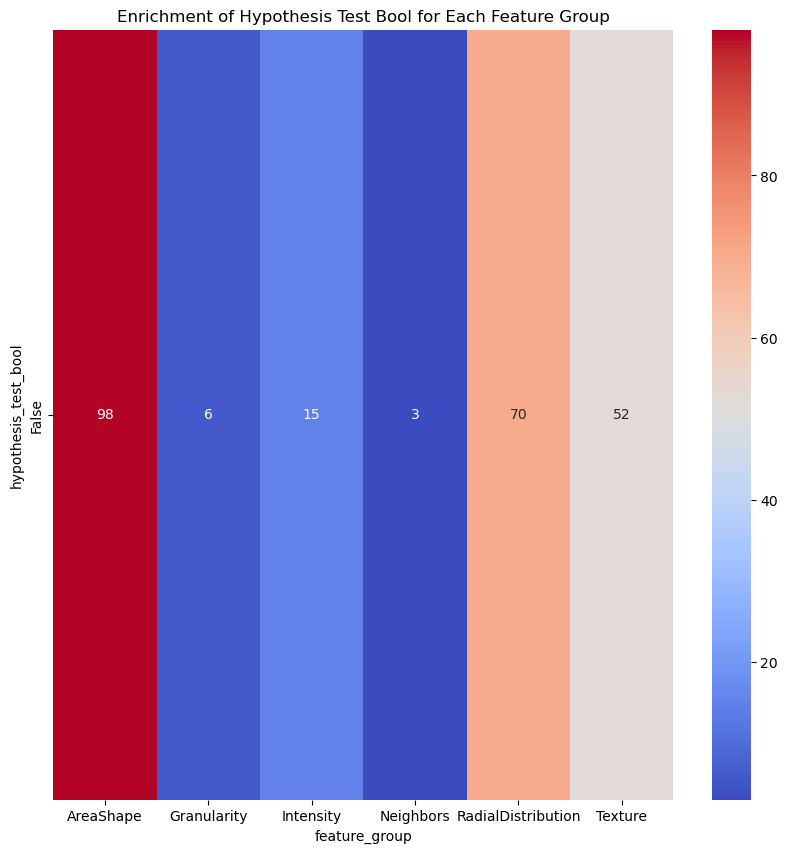

In [3]:
df_non_permuted = final_enrichment_df.loc[
    final_enrichment_df["permutation"] == "non_permuted"
]
# heatmap of true/false values for the hypothesis test bool against each feature type
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    df_non_permuted.pivot(
        index="hypothesis_test_bool", columns="feature_group", values="counts"
    ),
    annot=True,
    fmt="d",
    cmap="coolwarm",
    ax=ax,
)
plt.title("Enrichment of Hypothesis Test Bool for Each Feature Group")
plt.savefig("../figures/sum_aggregated/feature_group_enrichment_heatmap.png")
plt.show()

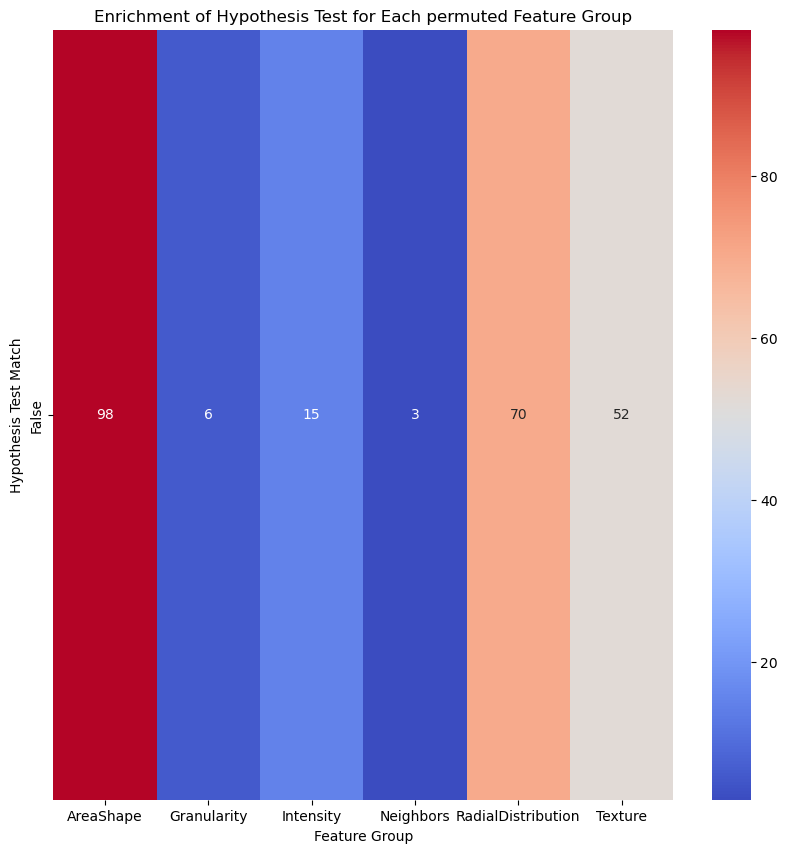

In [4]:
df_permuted = final_enrichment_df.loc[final_enrichment_df["permutation"] == "permuted"]
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    df_permuted.pivot(
        index="hypothesis_test_bool", columns="feature_group", values="counts"
    ),
    annot=True,
    fmt="d",
    cmap="coolwarm",
    ax=ax,
)
plt.title("Enrichment of Hypothesis Test for Each permuted Feature Group")
# label the x-axis
plt.xlabel("Feature Group")
# label the y-axis
plt.ylabel("Hypothesis Test Match")
# label the colorbar
plt.savefig(
    "../figures/sum_aggregated/feature_group_enrichment_heatmap_permutated_labels.png"
)
plt.show()